In [21]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.tabular import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from umap import UMAP
from functools import partial
import tqdm

In [22]:
data = pd.read_csv('database_fires.csv')

In [23]:
data.dtypes

id                    int64
estado               object
estacao               int64
data                 object
precipitacao        float64
temp_max            float64
temp_min            float64
insolacao           float64
evaporacao_piche    float64
temp_comp_med       float64
umidade_rel_med     float64
vel_vento_med       float64
altitude            float64
fires                 int64
dtype: object

In [27]:

data['data'] = pd.to_datetime(data['data'], format = '%d/%m/%Y')
###handle nans    
# ffill by estacao
prev_nans = data.isna().sum()
grp_data = data.groupby('estacao')
dfs = []
for grp,df in tqdm.tqdm(grp_data):
    df = df.sort_values(by = 'data')
    
    df = df.fillna(method = 'ffill')
    df = df.fillna(method = 'backfill')
    
    dfs.append(df)
data = pd.concat(dfs)
# median by date and state
data['mes'] = data['data'].dt.month
grp_data = data.groupby(['estado','mes'])
for grp,df in tqdm.tqdm(grp_data):
    df = df.fillna(df.median())
    dfs.append(df)
data = pd.concat(dfs)
#median by state
grp_data = data.groupby('mes')
for grp,df in tqdm.tqdm(grp_data):
    df = df.fillna(df.median())
    dfs.append(df)
data = pd.concat(dfs)





  0%|                                                                                          | 0/239 [00:00<?, ?it/s]


  2%|█▋                                                                                | 5/239 [00:00<00:04, 49.41it/s]


 18%|██████████████▉                                                                  | 44/239 [00:00<00:02, 66.94it/s]


 36%|████████████████████████████▊                                                    | 85/239 [00:00<00:01, 89.30it/s]


 52%|████████████████████████████████████████▉                                      | 124/239 [00:00<00:00, 115.94it/s]


 68%|█████████████████████████████████████████████████████▌                         | 162/239 [00:00<00:00, 146.37it/s]


 84%|██████████████████████████████████████████████████████████████████             | 200/239 [00:00<00:00, 179.02it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 335.78it/s]



  0%|               

 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:09<00:01,  1.15it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:10<00:00,  1.17it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:11<00:00,  1.09it/s]


In [28]:
nans_delta = prev_nans - data.isna().sum()
print(data.isna().sum())
nans_delta

#data.head(10)

altitude            0
data                0
estacao             0
estado              0
evaporacao_piche    0
fires               0
id                  0
insolacao           0
mes                 0
precipitacao        0
temp_comp_med       0
temp_max            0
temp_min            0
umidade_rel_med     0
vel_vento_med       0
dtype: int64


altitude                 0
data                     0
estacao                  0
estado                   0
evaporacao_piche         0
fires                    0
id                       0
insolacao                0
mes                 503534
precipitacao             0
temp_comp_med            0
temp_max                 0
temp_min                 0
umidade_rel_med          0
vel_vento_med            0
dtype: int64

In [41]:
num_features = [
    #'estacao',
    'precipitacao',
    'temp_max',
    'temp_min',
    'insolacao',
    'evaporacao_piche',
    'temp_comp_med',
    'umidade_rel_med',
    'vel_vento_med',
    'altitude',
    'fires'
]
emb_data = data.dropna().sample(10000)
print(emb_data.dtypes)
ump = UMAP()
embeddings = ump.fit_transform(emb_data[num_features].values[:,:-1])


altitude                   float64
data                datetime64[ns]
estacao                      int64
estado                      object
evaporacao_piche           float64
fires                        int64
id                           int64
insolacao                  float64
mes                        float64
precipitacao               float64
temp_comp_med              float64
temp_max                   float64
temp_min                   float64
umidade_rel_med            float64
vel_vento_med              float64
dtype: object


C:\Users\User Ambev\Anaconda3\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\User Ambev\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\User Ambev\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


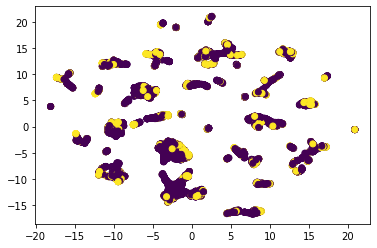

In [42]:
##
markers = ['x' if i == 1 else 'o' for i in emb_data['fires']]

plt.scatter(embeddings[:,0],embeddings[:,1], c = emb_data['fires'])


In [44]:
trnsf_embs = ump.transform(data[num_features].values)

C:\Users\User Ambev\Anaconda3\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))
C:\Users\User Ambev\Anaconda3\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 135:


KeyboardInterrupt: 

# Fastai

In [148]:
add_datepart(data,'data', drop = False)
categorical_features = [
    'estacao',
    'estado',
    #'date Date',
    #'date Year',
    'dataMonth',
    #'dataWeek',
    #'dataDay',
    #'dataDayofweek',
    #'dataDayofyear',
    #'dataIs_month_end',
    #'dataIs_month_start',
    #'dataIs_quarter_end',
    #'dataIs_quarter_start',
    'dataIs_year_end',
    'dataIs_year_start'
]
numerical_featues = [
    'precipitacao',
    'temp_max',
    'temp_min',
    'insolacao',
    'evaporacao_piche',
    'temp_comp_med',
    'umidade_rel_med',
    'vel_vento_med',
    'altitude',
    #'dataMonth'
    #date cont
    #'dateYear'
]
dependent_var = 'fires'

model_data = data.sample(50000)

In [149]:
validation_idxs = range(int(0.75*len(model_data)), len(model_data))
procs = [Normalize,FillMissing,Categorify]

src = (TabularList
       .from_df(model_data,path = '.', cat_names=categorical_features, procs=procs)
       .split_by_idx(validation_idxs)
       .label_from_df(cols = dependent_var)
       .databunch(num_workers = 0, bs = 256)
      )
src.show_batch()

estacao,estado,dataMonth,dataIs_year_end,dataIs_year_start,target
97580,CE,2,False,False,0
40261,SP,9,False,False,1
90853,ES,2,False,False,1
17651,PB,6,False,False,0
27400,MG,4,False,False,0


In [165]:
learn = tabular_learner(
    data = src,
    layers = [20],
    #emb_szs = emb_szs,
    #emb_drop = 0,
    metrics = [accuracy,Recall(),Precision()],
    callback_fns=[partial(
            callbacks.tracker.EarlyStoppingCallback,
            monitor='accuracy',
            min_delta=0.002,
            patience=3)]
)

epoch,train_loss,valid_loss,accuracy,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


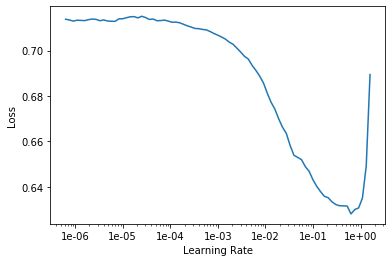

In [166]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,recall,precision,time
0,0.645927,0.622764,0.685760,0.688649,0.424385,00:03
1,0.603396,0.596332,0.704240,0.647115,0.441297,00:03
2,0.563195,0.551083,0.740960,0.548510,0.488149,00:03
3,0.524640,0.513076,0.762000,0.442930,0.534226,00:03
4,0.491867,0.485654,0.779280,0.352568,0.607983,00:04
5,0.479034,0.479844,0.781840,0.358275,0.616476,00:04
6,0.476444,0.478738,0.783120,0.344008,0.628257,00:04


In [66]:
preds = learn.get_preds()

In [83]:
#accs = [accuracy_thresh(preds[0][:,0],preds[1],thresh = i, sigmoid = False) for i in np.linspace(0,1,11)]
accs = [((preds[0][:,1].numpy() >= i) == preds[1].numpy()).mean() for i in np.linspace(0,1,101)]

In [84]:
accs

[0.3585398404079963,
 0.4034593493190132,
 0.4453919695591559,
 0.4803757045204495,
 0.5105474506190247,
 0.5371226173406364,
 0.5609412671239677,
 0.5814959863683485,
 0.6001104195545882,
 0.6171658716193941,
 0.6325918408687398,
 0.64672792701188,
 0.6595741300488149,
 0.6709328466399488,
 0.6817791847223822,
 0.6914498325833012,
 0.7008345017416897,
 0.7095409644631743,
 0.7173239542910708,
 0.7254594525891003,
 0.7329673865121322,
 0.7394873037371855,
 0.7455782529084432,
 0.7510148272013409,
 0.7562190437984326,
 0.7611362887113879,
 0.7655431410788547,
 0.7696064218106424,
 0.7734502536075022,
 0.7772573450849396,
 0.7806503632326715,
 0.7840870725710677,
 0.7876856379112434,
 0.7903289549464386,
 0.792887868545123,
 0.795497424205714,
 0.7978587344648028,
 0.7998893818490906,
 0.8019041415276823,
 0.8040847291344775,
 0.8061064396843113,
 0.8072533334392513,
 0.8087656444252027,
 0.8099234609778089,
 0.8111239757394734,
 0.8120226240929113,
 0.8127673602974178,
 0.81338995976438

In [112]:
learn.model.embeds[0].weight.data.numpy().shape

ModuleList(
  (0): Embedding(239, 10)
  (1): Embedding(27, 4)
  (2): Embedding(13, 4)
  (3): Embedding(3, 1)
  (4): Embedding(3, 1)
  (5): Embedding(3, 1)
  (6): Embedding(3, 1)
  (7): Embedding(3, 1)
  (8): Embedding(3, 1)
)